In [1]:
import cv2
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
import matplotlib.pyplot as plt
from PIL import Image

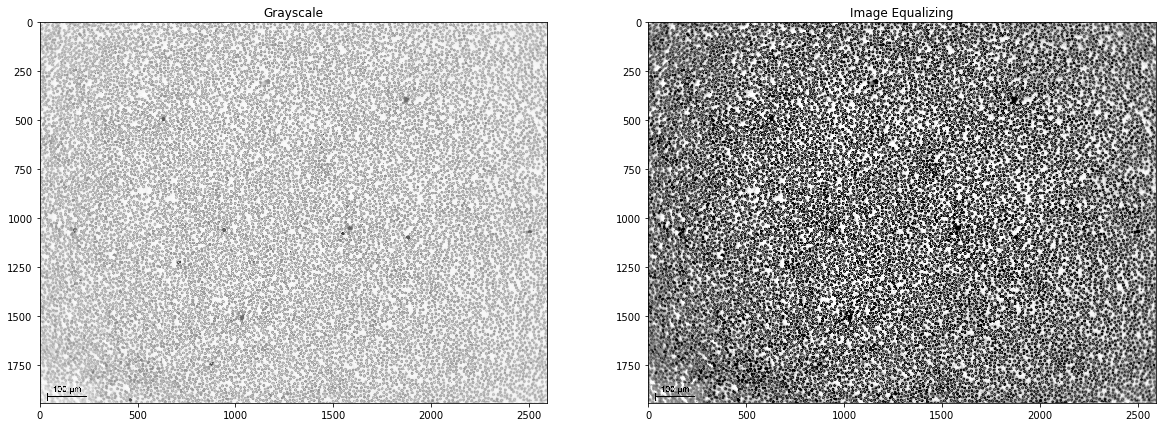

In [2]:
path = 'hematies.jpg'

#Read image
img = cv2.imread(path)

#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# equalize the image
dark = cv2.equalizeHist(gray)

# show 
fig, ax = plt.subplots(1, 2,figsize=(20,20))

ax[0].set_title('Grayscale')
ax[1].set_title('Image Equalizing')

ax[0].imshow(gray, cmap='gray')
ax[1].imshow(dark, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


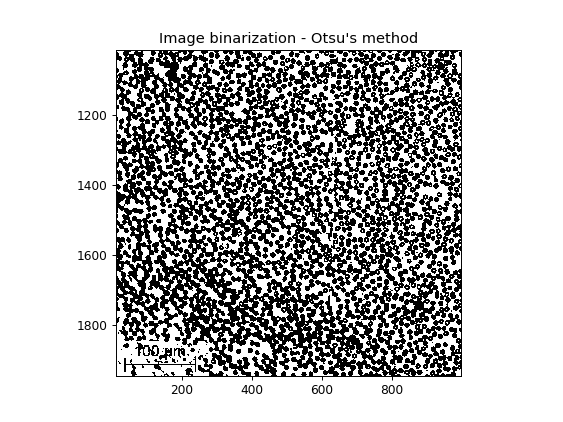

In [3]:
# threshold 
_, img_th = cv2.threshold(dark,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#show 
%matplotlib notebook
plt.title('Image binarization - Otsu\'s method')
plt.imshow(img_th, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


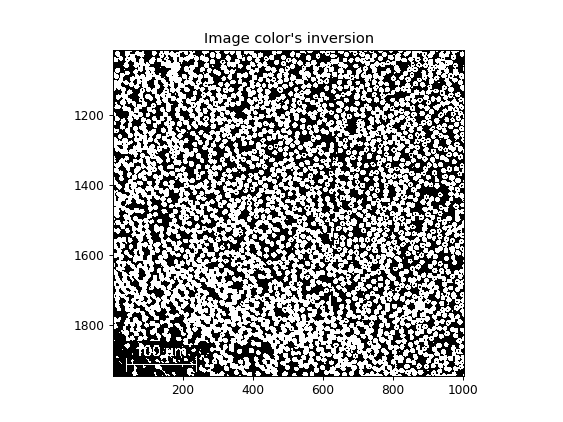

In [4]:
# invert
inv_img = cv2.bitwise_not(img_th)

#show
%matplotlib notebook
plt.title('Image color\'s inversion')
plt.imshow(inv_img, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


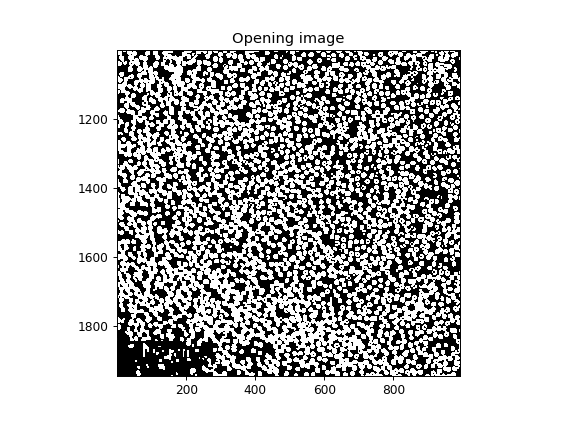

In [5]:
# opening
kernel = np.ones((5,5),np.uint8)
open_img = cv2.morphologyEx(inv_img, cv2.MORPH_OPEN, kernel)

#show
%matplotlib notebook
plt.title('Opening image')
plt.imshow(open_img, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


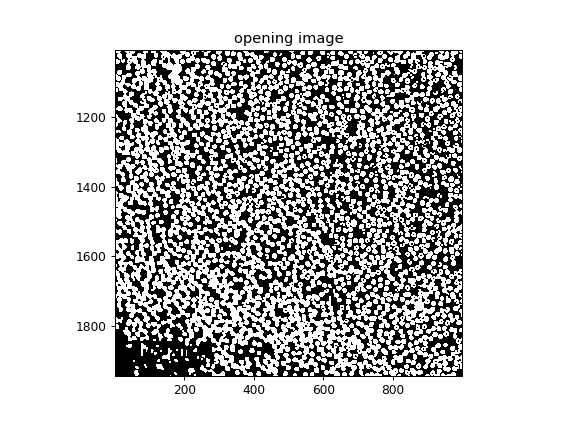

In [8]:
# find contours of the binary image
contours, _ = cv2.findContours(open_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#show 
%matplotlib notebook

plt.title('opening image')
plt.imshow(open_img, cmap='gray')
plt.show()

In [10]:
#compute the euclidean ditance from every binary pixel to the nearest zero pixel
dist = ndimage.distance_transform_edt(open_img)

#find peaks 
peaks = peak_local_max(dist, indices=False, min_distance=7, labels=open_img)
markers = ndimage.label(peaks, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=open_img)
print("{} red blood cells found".format(len(np.unique(labels)) - 1))

14979 red blood cells found


In [11]:
for label in np.unique(labels):
# if the label is zero, we are examining the 'background'
# so simply ignore it
    if label == 0:
        continue
 
    # otherwise, allocate memory for the label region and draw it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
 
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
 
    # draw circles which completely covers objects with minimum area
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img,center,radius,(0,255,0),2)

<IPython.core.display.Javascript object>


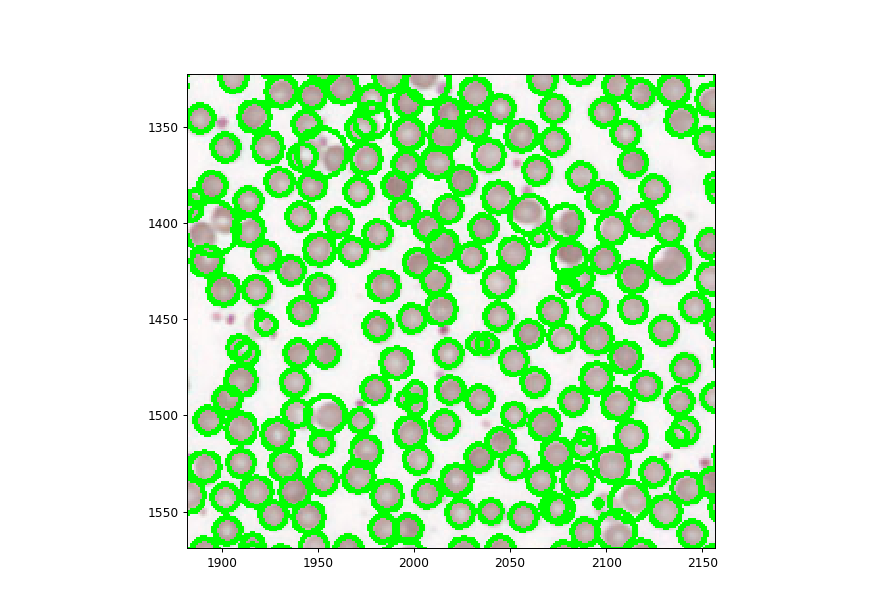

In [12]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.imshow(img, cmap='gray')
plt.show()